In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, size=(500, 300),
    titlefontsize=10, tickfontsize=6, guidefontsize=10)

distname(dist) = replace(string(dist), r"{[^}]*}"=>"")

function plot_mean_and_var(; dist = Normal(10, 2), n = 20, L = 10^6, M = 10^4,
        binX̄=:auto, binS²=:auto, xlimX̄=:auto, xlimS²=:auto, kwargs...)
    X̄ = Vector{Float64}(undef, L)
    S² = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, tmpX[Threads.threadid()])
        X̄[i] = mean(X)
        S²[i] = var(X)
    end
    
    @show mean(dist)
    @show var(dist)
    @show skewness(dist)
    @show kurtosis(dist)
    
    P1 = scatter(X̄[1:M], S²[1:M]; label="", ms=1, msw=0, alpha=0.5)
    plot!(xguide="\$\\overline{X}\$", yguide="\$S^2\$", yscale=:log10)
    title!("$(distname(dist)), n=$n")
    plot!(; kwargs...)
    P2 = stephist(X̄; norm=true, bin=binX̄, xlim=xlimX̄, 
        label="", title="\$\\overline{X}\$")
    P3 = stephist(S²; norm=true, bin=binS², xlim=xlimS², 
        label="", title="\$S^2\$")
    
    layout = @layout [a [b; c]]
    plot(P1, P2, P3; layout, size=(800, 400))
    plot!(leftmargin=4Plots.mm)
end

plot_mean_and_var (generic function with 1 method)

mean(dist) = 10.0
var(dist) = 4.0
skewness(dist) = 0.0
kurtosis(dist) = 0.0


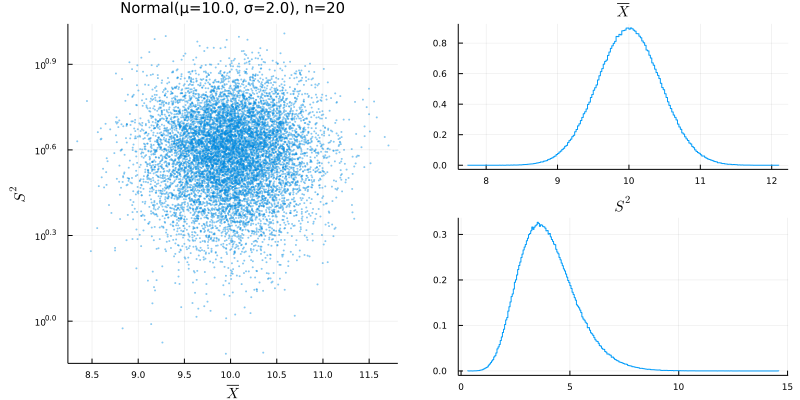

In [2]:
plot_mean_and_var(dist = Normal(10, 2), n = 20)

mean(dist) = 0.5
var(dist) = 0.08333333333333333
skewness(dist) = 0.0
kurtosis(dist) = -1.2


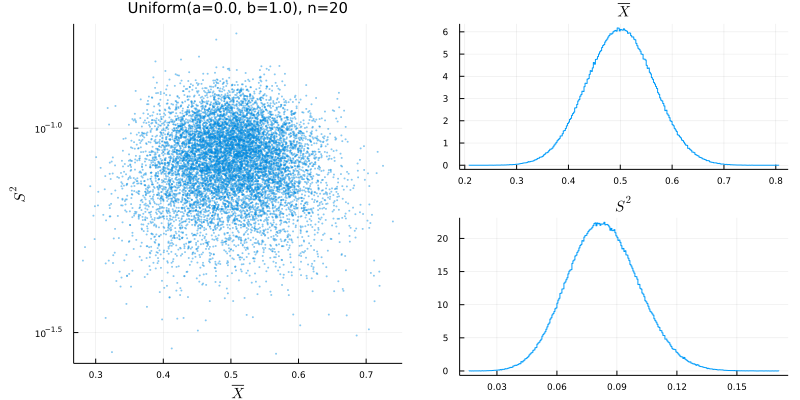

In [3]:
plot_mean_and_var(dist = Uniform(), n = 20)

mean(dist) = 8.0
var(dist) = 16.0
skewness(dist) = 1.0
kurtosis(dist) = 1.5


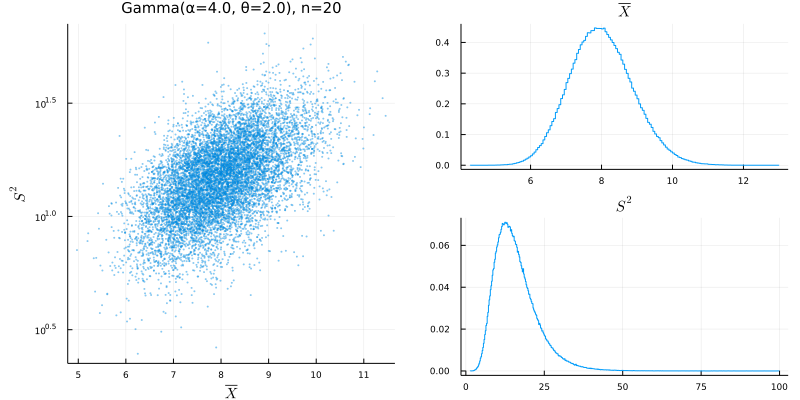

In [4]:
plot_mean_and_var(dist = Gamma(4, 2), n = 20)

mean(dist) = 1.0
var(dist) = 1.0
skewness(dist) = 1.0
kurtosis(dist) = 1.0


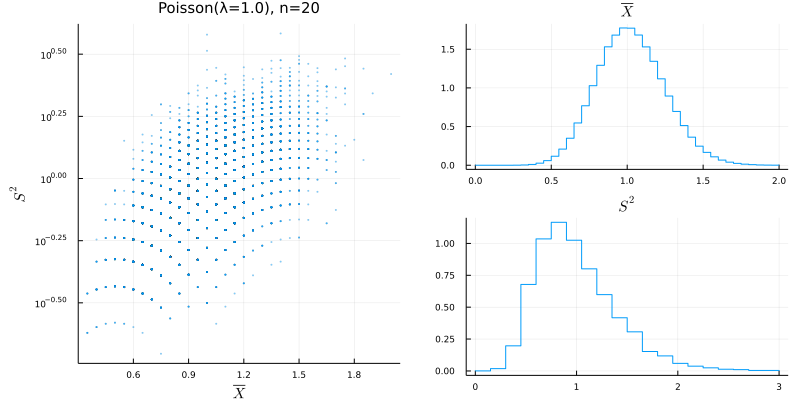

In [5]:
plot_mean_and_var(dist = Poisson(1), n = 20, binX̄=0:0.05:2, binS²=0:0.15:3)

mean(dist) = 1.0
var(dist) = 1.0
skewness(dist) = 1.0
kurtosis(dist) = 1.0


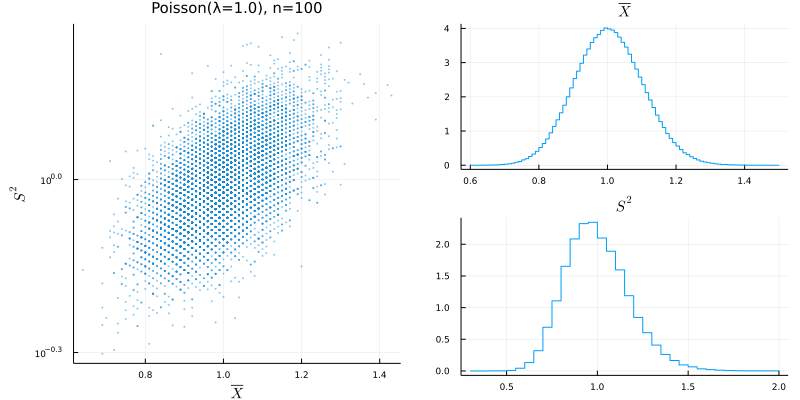

In [6]:
plot_mean_and_var(dist = Poisson(1), n = 100, binX̄=0.6:0.01:1.5, binS²=0.3:0.05:2)

mean(dist) = 1.6487212707001282
var(dist) = 4.670774270471604
skewness(dist) = 6.184877138632554
kurtosis(dist) = 110.9363921763115


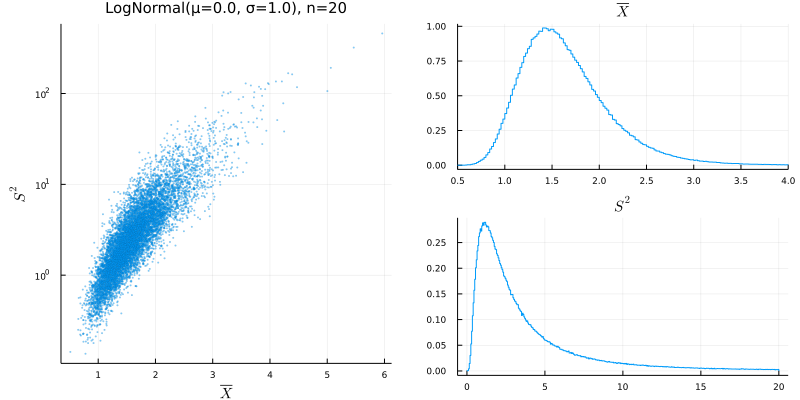

In [7]:
plot_mean_and_var(dist = LogNormal(), n = 20, xlimX̄=(0.5, 4), binS²=0:0.05:20)

mean(dist) = 1.6487212707001282
var(dist) = 4.670774270471604
skewness(dist) = 6.184877138632554
kurtosis(dist) = 110.9363921763115


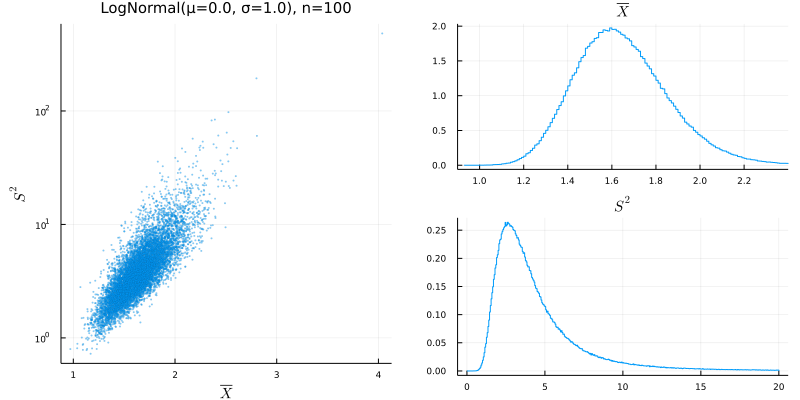

In [8]:
plot_mean_and_var(dist = LogNormal(), n = 100, xlimX̄=(0.9, 2.4), binS²=0:0.05:20)

mean(dist) = 1.6487212707001282
var(dist) = 4.670774270471604
skewness(dist) = 6.184877138632554
kurtosis(dist) = 110.9363921763115


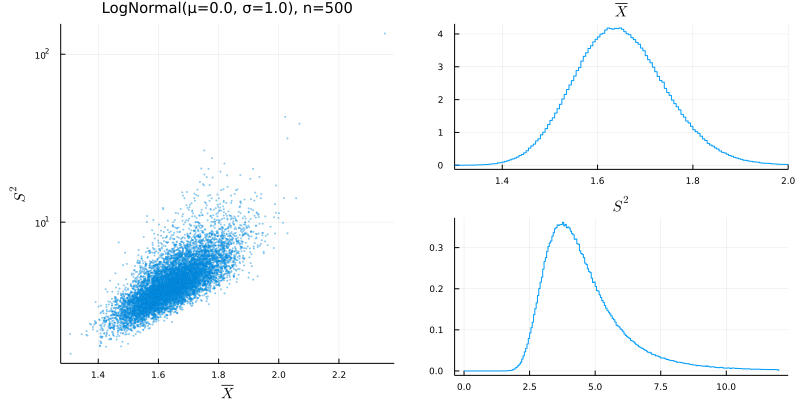

In [9]:
plot_mean_and_var(dist = LogNormal(), n = 500, xlimX̄=(1.3, 2.0), binS²=0:0.05:12)